In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(style="ticks", color_codes=True)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei',font_scale=1)  # 解决Seaborn中文显示问题并调整字体大小



In [2]:
date = pd.read_csv('./HR_comma_sep.csv')
display(date)
date.left.astype(np.float64)
date_label = date.left
date_raw = date.drop(columns=['left'])
# date_label

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
from sklearn.preprocessing import StandardScaler
# 数据标准化
st = StandardScaler().fit_transform(date_raw[['average_montly_hours','number_project','time_spend_company']])
date_raw[['average_montly_hours','number_project','time_spend_company']] = pd.DataFrame(st)

In [4]:
date_raw

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,-1.462863,-0.882040,-0.341235,0,0,sales,low
1,0.80,0.86,0.971113,1.220423,1.713436,0,0,sales,medium
2,0.11,0.88,2.593763,1.420657,0.343655,0,0,sales,medium
3,0.72,0.87,0.971113,0.439508,1.028546,0,0,sales,low
4,0.37,0.52,-1.462863,-0.841993,-0.341235,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,-1.462863,-1.002181,-0.341235,0,0,support,low
14995,0.37,0.48,-1.462863,-0.821970,-0.341235,0,0,support,low
14996,0.37,0.53,-1.462863,-1.162368,-0.341235,0,0,support,low
14997,0.11,0.96,1.782438,1.580845,0.343655,0,0,support,low


In [5]:
# 数据编码
from  sklearn.preprocessing import OneHotEncoder
# 非标签特征
encode=OneHotEncoder()
encode.fit(date_raw.iloc[:,-4:])
res = encode.transform(date_raw.iloc[:,-4:])
res_cloum = encode.get_feature_names()
modify = pd.DataFrame( res.toarray(),columns=res_cloum)
date_raw = date_raw.iloc[:,:-4]
features =  pd.concat([date_raw,modify],axis=1)

c:\Users\Dawn\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [6]:
features

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,x0_0,x0_1,x1_0,x1_1,x2_IT,...,x2_hr,x2_management,x2_marketing,x2_product_mng,x2_sales,x2_support,x2_technical,x3_high,x3_low,x3_medium
0,0.38,0.53,-1.462863,-0.882040,-0.341235,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.80,0.86,0.971113,1.220423,1.713436,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.11,0.88,2.593763,1.420657,0.343655,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.72,0.87,0.971113,0.439508,1.028546,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.37,0.52,-1.462863,-0.841993,-0.341235,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,-1.462863,-1.002181,-0.341235,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14995,0.37,0.48,-1.462863,-0.821970,-0.341235,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14996,0.37,0.53,-1.462863,-1.162368,-0.341235,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14997,0.11,0.96,1.782438,1.580845,0.343655,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [7]:
from sklearn.model_selection import train_test_split
# 数据划分
X_train,X_test,y_train,y_test = train_test_split(features,date_label,test_size=0.2,random_state=123,stratify=date_label)

In [8]:
y_train

6197     0
1955     1
9440     0
9365     0
7725     0
        ..
10341    0
9372     0
1574     1
8994     0
8660     0
Name: left, Length: 11999, dtype: int64

In [9]:
# 模型搭建

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10,random_state=123)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=123)

In [10]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [11]:
result = pd.DataFrame(y_predict,y_test)
result.reset_index()


,left,0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,0,0


In [12]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_predict,y_test)
score

0.9803333333333333

In [13]:
model.classes_

# predict_proba返回模型中每个类的样本概率，其中类按类<mark>self.classes_</mark>进行排序。

array([0, 1], dtype=int64)

In [14]:
# 命中率
y_predict_proba =model.predict_proba(X_test) #二维数据
display(y_predict_proba)
y_predict_proba = pd.DataFrame(y_predict_proba)
y_predict_proba.columns = ['不离职概率','离职概率']
display(y_predict_proba)

array([[0.99151344, 0.00848656],
       [1.        , 0.        ],
       [0.99172185, 0.00827815],
       ...,
       [0.99674756, 0.00325244],
       [0.99151344, 0.00848656],
       [0.01339286, 0.98660714]])

,不离职概率,离职概率
0,0.991513,0.008487
1,1.000000,0.000000
2,0.991722,0.008278
3,0.996748,0.003252
4,0.996748,0.003252
...,...,...
2995,0.991513,0.008487
2996,1.000000,0.000000
2997,0.996748,0.003252
2998,0.991513,0.008487


In [15]:
# 模型效果评测

from sklearn.metrics import roc_curve
fpr,tpr,thresh = roc_curve(y_test,y_predict_proba.iloc[:,1])



In [16]:
cuver = pd.DataFrame(fpr,columns=['假警报率'])
cuver["命中率"] = tpr
cuver["阈值"] =thresh
cuver


,假警报率,命中率,阈值
0,0.000000,0.000000,2.000000
1,0.003937,0.682073,1.000000
2,0.004812,0.927171,0.986607
3,0.005249,0.936975,0.975000
4,0.005687,0.939776,0.909091
5,0.006124,0.939776,0.750000
6,0.006562,0.942577,0.666667
7,0.010061,0.945378,0.500000
8,0.011374,0.949580,0.250000
9,0.013561,0.949580,0.240000


<AxesSubplot:xlabel='假警报率', ylabel='命中率'>

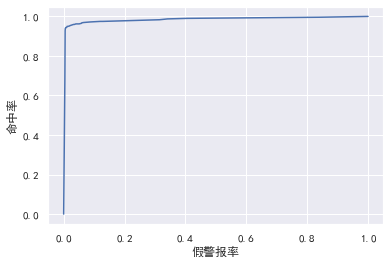

In [17]:
sns.lineplot(data=cuver,y="命中率",x="假警报率")

In [18]:
# 特征重要性评估

features_names = X_train.columns
importances=model.feature_importances_
features_importances=pd.DataFrame(features_names,columns=['name'])
features_importances['importances'] = importances
features_importances.sort_values(by='importances',ascending=False)
# features_importances.reset_index()
# features_importances.sort_values(by=[''])

,name,importances
0,satisfaction_level,0.524724
1,last_evaluation,0.144338
4,time_spend_company,0.133976
2,number_project,0.108295
3,average_montly_hours,0.082582
20,x3_low,0.000987
17,x2_support,0.000967
19,x3_high,0.000825
5,x0_0,0.000694
6,x0_1,0.000632


In [19]:
# 参数调优
# k折交叉
from sklearn.model_selection import cross_val_score
acc = cross_val_score(model,X_train,y_train,cv=5)
acc

array([0.97458333, 0.98208333, 0.98166667, 0.97791667, 0.97790746])

In [24]:
# 网格搜索

from sklearn.model_selection import GridSearchCV

#单参数

parameters = {'max_depth':[3,5,6,7,8,10,11,13]}
model = DecisionTreeClassifier()
grid_search = GridSearchCV(model,parameters,scoring='roc_auc',cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_  #最好的参数


{'max_depth': 7}

In [ ]:
# 多参数
